# Youtube Category Classification
By : Hesham Asem
____


in this dataset , we have a dataset for viewership habits for specific most famous videos on Youtube , for Great Britain on 2017 , 2018

we need to make a classification model , so it can detect which category of the video depend on viewership habits & video details

dataset here : 
https://www.kaggle.com/datasnaek/youtube-new#GBvideos.csv

____


let's first import needed libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
sns.set(style="darkgrid")

then we can open the dataset

In [2]:
data = pd.read_csv('GBvideos.csv') 

let's have a look at it 

In [3]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


____

ok , several important & less important features , how is the dimension ? 

In [4]:
data.shape

(38916, 16)


______

# Important Functions 

so we'll need to define important functions which will be used here

In [5]:
def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)

In [6]:
def make_countplot(feature) :
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("prism", 3)) 

In [7]:
def make_kdeplot(feature) : 
    sns.kdeplot(data[feature], shade=True)

In [8]:
def make_pie(feature) : 
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()


_______


# Data Processing 

so we'll need to start with processing the features one after one , the list of features is : 

In [9]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

unique data is an important thing to know about each feature , so let;s know the umber of unique values for each feature 

In [10]:
for col in data.columns : 
    print('Unique values for Column {0}     is      {1}'.format(col ,len(data[col].unique())))

Unique values for Column video_id     is      3272
Unique values for Column trending_date     is      205
Unique values for Column title     is      3369
Unique values for Column channel_title     is      1625
Unique values for Column category_id     is      16
Unique values for Column publish_time     is      3250
Unique values for Column tags     is      3122
Unique values for Column views     is      38393
Unique values for Column likes     is      30556
Unique values for Column dislikes     is      11092
Unique values for Column comment_count     is      15778
Unique values for Column thumbnail_link     is      3272
Unique values for Column comments_disabled     is      2
Unique values for Column ratings_disabled     is      2
Unique values for Column video_error_or_removed     is      2
Unique values for Column description     is      3705


_____

as shown here , some features will be used with its original values , & some will need some processing


let's start with video_id . 

since video_id generally refer to something useless , which will not be helpful in training , but here we can see that there is 3272 unique values from almost 39K sample size , which mean there is a huge number of repeating video_id , so this feature will be important in training

we'll have to convert it using labelencoder from sklearn , to use code instead of it 


In [11]:
make_label_encoder('video_id' , 'video_id Code')

now let's have a look to the data

In [12]:
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,video_id Code
0,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,1047
1,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,227
2,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2628
3,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,1344
4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,2854


____

now how about trending_date , we need to know more about it

In [13]:
data['trending_date'].unique()

array(['17.14.11', '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '18.29.

ok , how many unique values ? 


In [14]:
len(data['trending_date'].unique())

205

from 39K row , there is only 205 unique value , so we'll need it 

now let's make a smart step , we can extract new features from treding_date , by getting the year , month & date of it to use them as separate 3 new features 

In [15]:
year_list = []
month_list = []
day_list = []
for x in range(data.shape[0]) :
    year_list.append(data['trending_date'][x][:2])
    month_list.append(data['trending_date'][x][6:])
    day_list.append(data['trending_date'][x][3:5])

now we can add them to the data

In [16]:
data.insert(16,'Year',year_list)
data.insert(17,'Month',month_list)
data.insert(18,'Day',day_list)

and have a look now

In [17]:
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,video_id Code,Year,Month,Day
0,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,1047,17,11,14
1,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,227,17,11,14
2,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2628,17,11,14
3,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,1344,17,11,14
4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,2854,17,11,14


____


cool  , now let's see how countplot of different years , months & days

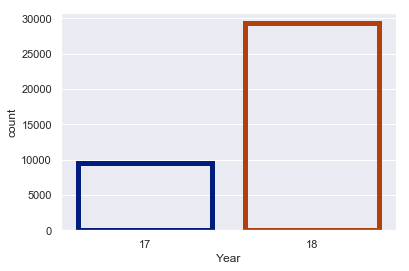

In [18]:
ax = sns.countplot(x="Year", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark",3))

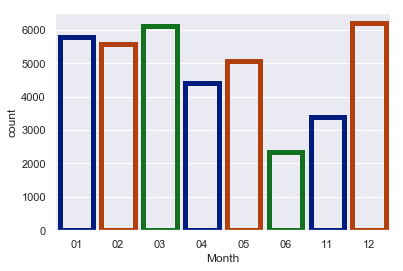

In [19]:
ax = sns.countplot(x="Month", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark",3))

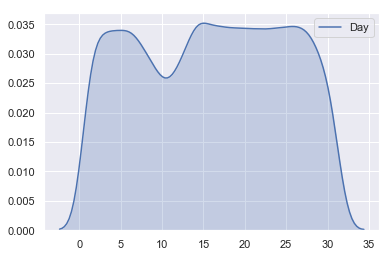

In [20]:
ax = sns.kdeplot(data['Day'], shade=True)

as we get all what we need from trending_date , we can drop it now

In [21]:
data.drop(['trending_date'],axis=1, inplace=True)


also we can handle the Year value , to make it either 0 or 1 , instead of 17 & 18 , so it may be easier for the model in calculation 

In [22]:
year_dict = {'17': 0,'18':1}
data['Year'] = data['Year'].map(year_dict)


how it looks now

In [23]:
data.head()

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,video_id Code,Year,Month,Day
0,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,1047,0,11,14
1,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,227,0,11,14
2,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2628,0,11,14
3,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,1344,0,11,14
4,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,2854,0,11,14


______


# Words Processing

we have here a big point which related to the title of the video 

the title contain several different words , which might be important for training , but also we can never just use labelencoder to convert unique values , we need to make something more smart

first let's know the amount of unique values

In [24]:
len(data['title'].unique())

3369


____

OK , we'll make a HUGE list contain all words separately of all titles , then we'll focus only on most repeated words , as they are important keywords

In [25]:
all_words = []
for x in range(data.shape[0]) : 
    all_words = all_words  +  data['title'][x].split()

great , how many words we have now  ? 

In [26]:
len(all_words)

340307

so we need to convert it to Series so we can easily count repeated words 

In [27]:
all_words_series = pd.Series(all_words)

so we'll make a new Series which is the most repeated 30 words here

In [28]:
top_words =  all_words_series.value_counts()[:30] 
top_words

-            17845
|             8728
The           6012
Video)        3757
(Official     3526
&             3052
the           2622
Trailer       2394
ft.           2238
Official      2104
of            1975
and           1751
A             1682
in            1682
Music         1659
2018          1343
to            1303
I             1246
on            1190
a             1142
with          1121
Me            1092
My            1000
Star           958
[Official      940
Video]         917
In             847
To             807
You            807
Last           795
dtype: int64

ok , we need to get only the index (the words themselves)

In [29]:
top_words = list(top_words.index)

In [30]:
top_words

['-',
 '|',
 'The',
 'Video)',
 '(Official',
 '&',
 'the',
 'Trailer',
 'ft.',
 'Official',
 'of',
 'and',
 'A',
 'in',
 'Music',
 '2018',
 'to',
 'I',
 'on',
 'a',
 'with',
 'Me',
 'My',
 'Star',
 '[Official',
 'Video]',
 'In',
 'To',
 'You',
 'Last']

as we see , there are many meaningless words , which looks like stopwords , so we have to drop them to avoid any misleading in training as they refer to nothing in the meaning 

In [31]:
top_words.remove('-')
top_words.remove('|')
top_words.remove('The')
top_words.remove('&')
top_words.remove('the')
top_words.remove('of')
top_words.remove('and')
top_words.remove('in')
top_words.remove('on')
top_words.remove('a')
top_words.remove('with')
top_words.remove('In')
top_words.remove('To')
top_words.remove('A')

great , now let's have another look

In [32]:
top_words

['Video)',
 '(Official',
 'Trailer',
 'ft.',
 'Official',
 'Music',
 '2018',
 'to',
 'I',
 'Me',
 'My',
 'Star',
 '[Official',
 'Video]',
 'You',
 'Last']

here we go they are 16 words 

but since there are repeating words here which are Video) , Video] , also 3 different types of official , so they are 13 words

now we'll make 13 lists , each one will be either 1 if the title contain this word , or 0 if it doesn't , then we'll insert them in the dataset later

In [33]:
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
l7 = []
l8 = []
l9 = []
l10 = []
l11 = []
l12 = []
l13 = []

this_list = []
for x in range(data.shape[0]) : 
    this_list  =  data['title'][x].split()
    
    if ('Video)' in this_list) or ('Video]' in this_list)  : 
        l1.append(1)
    else : 
        l1.append(0)
        
    if ('(Official' in this_list) or ( 'Official'in this_list)  or ( '[Official' in this_list)  : 
        l2.append(1)
    else : 
        l2.append(0)
        
    if 'Trailer' in this_list : 
        l3.append(1)
    else : 
        l3.append(0)

    if 'You' in this_list : 
        l4.append(1)
    else : 
        l4.append(0)
    if 'Last' in this_list : 
        l5.append(1)
    else : 
        l5.append(0)
    if 'Star' in this_list : 
        l6.append(1)
    else : 
        l6.append(0)
    if 'My' in this_list : 
        l7.append(1)
    else : 
        l7.append(0)
    if 'Me' in this_list : 
        l8.append(1)
    else : 
        l8.append(0)
    if  'I'  in this_list : 
        l9.append(1)
    else : 
        l9.append(0)
    if 'to' in this_list : 
        l10.append(1)
    else : 
        l10.append(0)
    if '2018' in this_list : 
        l11.append(1)
    else : 
        l11.append(0)
    if 'Music' in this_list : 
        l12.append(1)
    else : 
        l12.append(0)
 
    if 'ft.' in this_list : 
        l13.append(1)
    else : 
        l13.append(0)

perfect , let's check the length of any of these lists

In [34]:
len(l12)

38916

exactly the length of our dataset , now le'ts insert them in the dataset

In [35]:
data.insert(18,'word 1',l1)
data.insert(19,'word 2',l2)
data.insert(20,'word 3',l3)
data.insert(21,'word 4',l4)
data.insert(22,'word 5',l5)
data.insert(23,'word 6',l6)
data.insert(24,'word 7',l7)
data.insert(25,'word 8',l8)
data.insert(26,'word 9',l9)
data.insert(27,'word 10',l10)
data.insert(28,'word 11',l11)
data.insert(29,'word 12',l12)
data.insert(30,'word 13',l13)

now we can safely drop the title feature

In [36]:
data.drop(['title'],axis=1, inplace=True)


let's see how it looks like now

In [37]:
data.head()

,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,...,word 4,word 5,word 6,word 7,word 8,word 9,word 10,word 11,word 12,word 13
0,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,...,0,0,0,0,0,0,0,0,0,0
1,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,...,0,0,0,0,0,0,0,0,0,0
2,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,...,0,0,0,0,0,0,0,0,0,1
3,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,...,0,0,0,0,0,0,0,0,0,0
4,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,...,0,0,0,0,0,0,0,0,0,0


_______


# More Data Processing

ok , let's continue in the rest of features

how about the channel_title

In [38]:
len(data['channel_title'].unique())

1625

ok , we might not need to make that word processing as we did in the title , let's just convert it using labelencoder

In [39]:
make_label_encoder('channel_title' , 'channel Code')

how the data looks like

In [40]:
data.head()

,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,word 5,word 6,word 7,word 8,word 9,word 10,word 11,word 12,word 13,channel Code
0,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,...,0,0,0,0,0,0,0,0,0,631
1,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,...,0,0,0,0,0,0,0,0,0,1137
2,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,...,0,0,0,0,0,0,0,0,1,375
3,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,...,0,0,0,0,0,0,0,0,0,1126
4,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,...,0,0,0,0,0,0,0,0,0,277


how about category_id

In [41]:
data['category_id'].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43],
      dtype=int64)

so this is the output , which we'll need to classify the data depend on it , how many categories we have here

In [42]:
len(data['category_id'].unique())

16

let's draw it

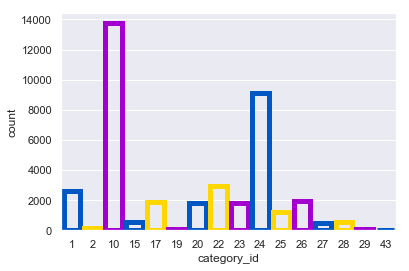

In [43]:
make_countplot('category_id')

majority of them in 10th & 24th category , ok , nothing to be done with it

_____

how about publish time

In [44]:
len(data['publish_time'].unique())

3250

more than 3 thousand unique values , how this data looks like ? 

In [45]:
data['publish_time'][:10]

0    2017-11-10T07:38:29.000Z
1    2017-11-12T06:24:44.000Z
2    2017-11-10T17:00:03.000Z
3    2017-11-13T02:30:38.000Z
4    2017-11-13T01:45:13.000Z
5    2017-11-11T17:00:00.000Z
6    2017-11-09T11:04:14.000Z
7    2017-11-10T19:19:43.000Z
8    2017-11-10T08:00:01.000Z
9    2017-11-10T15:00:00.000Z
Name: publish_time, dtype: object

so it's year them month then day then housr , minute , second . .

I think the most important part of data here is the House of publishing , since the day , month & year is somehow related to trending date which we already included

so let's make something useful with it , we'll use the publishing hour to know which quarter of the day it published , & use it as an important feature

In [46]:
publish_quarter = []

for x in range(data.shape[0]):
    publish_hour = int(str(data['publish_time'][x])[11:13])
    if publish_hour >=0 and publish_hour < 6  : 
        publish_quarter.append(1)
    elif publish_hour >=6 and publish_hour < 12  : 
        publish_quarter.append(2)
    elif publish_hour >=12 and publish_hour < 18  : 
        publish_quarter.append(3)
    else: 
        publish_quarter.append(4)

great , let's be sure the length of the list is equal to data length

In [47]:
len(publish_quarter)

38916

now to insert it

In [48]:
data.insert(30,'Publish Quarter',publish_quarter)

how data looks like

In [49]:
data.head()

,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,word 6,word 7,word 8,word 9,word 10,word 11,word 12,word 13,channel Code,Publish Quarter
0,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,...,0,0,0,0,0,0,0,0,631,2
1,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,...,0,0,0,0,0,0,0,0,1137,2
2,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,...,0,0,0,0,0,0,0,1,375,3
3,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,...,0,0,0,0,0,0,0,0,1126,1
4,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,...,0,0,0,0,0,0,0,0,277,1


so we can encode publish time now

In [50]:
make_label_encoder('publish_time' , 'publish time code')

In [51]:
data.head()

,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,...,word 7,word 8,word 9,word 10,word 11,word 12,word 13,channel Code,Publish Quarter,publish time code
0,26,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,...,0,0,0,0,0,0,0,631,2,246
1,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,...,0,0,0,0,0,0,0,1137,2,275
2,10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,...,0,0,0,0,0,0,1,375,3,260
3,17,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,...,0,0,0,0,0,0,0,1126,1,284
4,25,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,...,0,0,0,0,0,0,0,277,1,283


_____

ok how about tags ? 

In [52]:
len(data['tags'].unique())

3122

how it looks like ? 

In [53]:
data['tags'][:10]

0    christmas|"john lewis christmas"|"john lewis"|...
1    SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...
2    Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...
3    Salford City FC|"Salford City"|"Salford"|"Clas...
4                                               [none]
5    pointlessblog|"pointlessblogtv"|"pointlessblog...
6    edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...
7    zoe sugg|"zoella"|"zoe"|"vlog"|"vlogging"|"vlo...
8    Elbow|"Golden"|"Slumbers"|"Polydor"|"Alternative"
9    Jennifer Lopez ft. Wisin|"Jennifer Lopez ft. W...
Name: tags, dtype: object

let's see a random tag

In [54]:
data['tags'][10]

'nile wilson|"nile wilson gymnastics"|"nile wilson olympics"|"olympic gymnast"|"amazing gymnastics"|"gymnastics"|"strength training"|"strength"|"hard work"|"vlogging"|"vlog"|"success"|"fitness"|"world record"|"has to be a world record"|"can babies do gymnastics"|"youngest gymnast in the world"|"ultimate gymnastics challenge"|"trampoline challenge"|"gymmastics challenge"|"baby gymnastics"'

we can encode it directly now

In [55]:
make_label_encoder('tags' , 'tags code')

In [56]:
data.head()

,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,...,word 8,word 9,word 10,word 11,word 12,word 13,channel Code,Publish Quarter,publish time code,tags code
0,26,7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,...,0,0,0,0,0,0,631,2,246,1795
1,24,1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,...,0,0,0,0,0,0,1137,2,275,1110
2,10,17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,...,0,0,0,0,0,1,375,3,260,423
3,17,27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,...,0,0,0,0,0,0,1126,1,284,1136
4,25,9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,...,0,0,0,0,0,0,277,1,283,1580


___

# Viewership Numbers

ow we need to focus in important numbers like : views, likes & dislikes

let's start with views

In [57]:
len(data['views'].unique())

38393

almost there is no repeated values here , how about min & max values for views of these videos

In [58]:
data['views'].min()

851

In [59]:
data['views'].max()

424538912

the different is HUGE , from 800 to 400 Million , even drawing it will not be easy

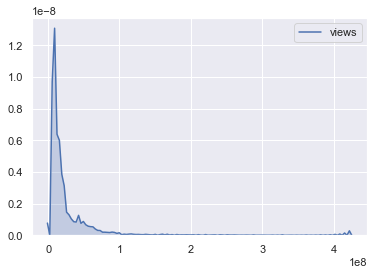

In [60]:
make_kdeplot('views')

so it's clear that majority of videos within 800 to 30 Million


so we'll make an important function to make 10 sectors of this feature (or any feature) , depend on the max value we define

In [61]:
def feature_sectors(data , maxx , feature , new_featre):
    step = (maxx- data[feature].min())/10
    new_list = []
    minn = data[feature].min()
    for x in range(data.shape[0]) : 
        if data[feature][x] <= (minn + step):
            new_list.append(1)
        elif data[feature][x] <= (minn + (2*step)):
            new_list.append(2)            
        elif data[feature][x] <= (minn + (3*step)):
            new_list.append(3)            
        elif data[feature][x] <= (minn + (4*step)):
            new_list.append(4)            
        elif data[feature][x] <= (minn + (5*step)):
            new_list.append(5)            
        elif data[feature][x] <= (minn + (6*step)):
            new_list.append(6)            
        elif data[feature][x] <= (minn + (7*step)):
            new_list.append(7)            
        elif data[feature][x] <= (minn + (8*step)):
            new_list.append(8)            
        elif data[feature][x] <= (minn + (9*step)):
            new_list.append(9)            
        else:
            new_list.append(10)            
    data.insert(data.shape[1], new_featre , new_list)   
    


___


great , now let's use it to make 10 sectors for the feature views , with max 50 Million , & check how it looks like

In [62]:
feature_sectors(data ,50000000 , 'views' , 'views sector')

how data looks like now

In [63]:
data.head()

,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,...,word 9,word 10,word 11,word 12,word 13,channel Code,Publish Quarter,publish time code,tags code,views sector
0,26,7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,...,0,0,0,0,0,631,2,246,1795,2
1,24,1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,...,0,0,0,0,0,1137,2,275,1110,1
2,10,17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,...,0,0,0,0,1,375,3,260,423,4
3,17,27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,...,0,0,0,0,0,1126,1,284,1136,1
4,25,9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,...,0,0,0,0,0,277,1,283,1580,1


let's graph it

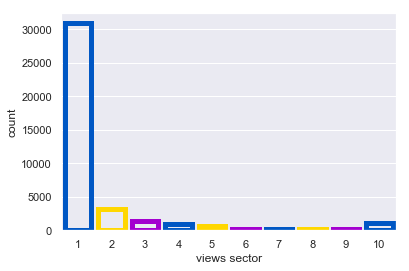

In [64]:
make_countplot('views sector')

well, not very representative m since almost all sectors less than 50 Million , lets drop this sector , & make a new sector with only 1 million views as max

In [65]:
data.drop(['views sector'],axis=1, inplace=True)

In [66]:
feature_sectors(data ,1000000 , 'views' , 'views sector')

how data looks like

In [67]:
data.head()

,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,...,word 9,word 10,word 11,word 12,word 13,channel Code,Publish Quarter,publish time code,tags code,views sector
0,26,7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,...,0,0,0,0,0,631,2,246,1795,10
1,24,1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,...,0,0,0,0,0,1137,2,275,1110,10
2,10,17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,...,0,0,0,0,1,375,3,260,423,10
3,17,27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,...,0,0,0,0,0,1126,1,284,1136,1
4,25,9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,...,0,0,0,0,0,277,1,283,1580,1


and graph

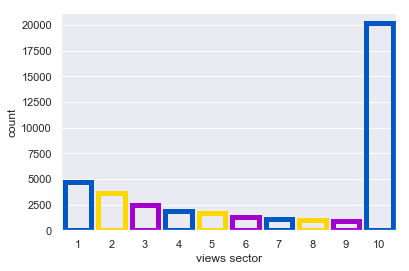

In [68]:
make_countplot('views sector')

not very well , 1 Million is too small for that , let's use 10 million instead , but first drop that sector feature

In [69]:
data.drop(['views sector'],axis=1, inplace=True)

In [70]:
feature_sectors(data ,10000000 , 'views' , 'views sector')

In [71]:
data.head()

,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,...,word 9,word 10,word 11,word 12,word 13,channel Code,Publish Quarter,publish time code,tags code,views sector
0,26,7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,...,0,0,0,0,0,631,2,246,1795,8
1,24,1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,...,0,0,0,0,0,1137,2,275,1110,2
2,10,17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,...,0,0,0,0,1,375,3,260,423,10
3,17,27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,...,0,0,0,0,0,1126,1,284,1136,1
4,25,9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,...,0,0,0,0,0,277,1,283,1580,1


ok the graph 

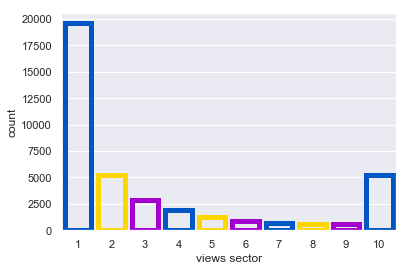

In [72]:
make_countplot('views sector')

ok , I think this is kinda good as a representative for the data 

______


we need to make something similar in likes


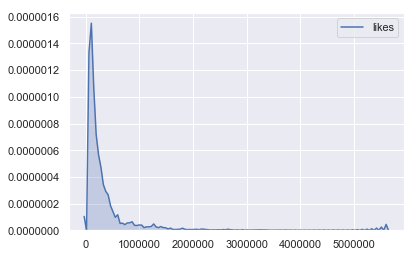

In [73]:
make_kdeplot('likes')

I think 500 thousands is a suitable number to divide on it

In [74]:
feature_sectors(data ,500000 , 'likes' , 'likes sectors')

how it looks 

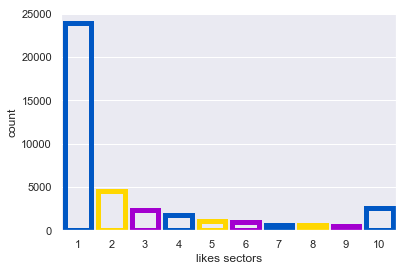

In [75]:
make_countplot('likes sectors')

kinda suitable , let's do it in dislikes

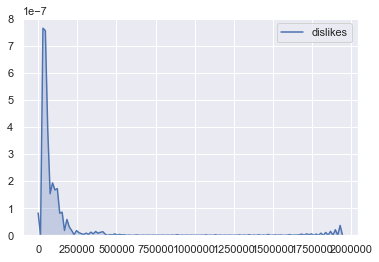

In [76]:
make_kdeplot('dislikes')

may be 50 thousand is suitable

In [77]:
feature_sectors(data ,50000 , 'dislikes' , 'dislikes sectors')

how it looks now

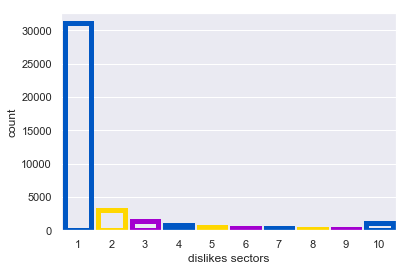

In [78]:
make_countplot('dislikes sectors')

I think we can reduce it a little bit , let's drop it first

In [79]:
data.drop(['dislikes sectors'],axis=1, inplace=True)

& make it with 10 thousands

In [80]:
feature_sectors(data ,10000 , 'dislikes' , 'dislikes sectors')

how it looks

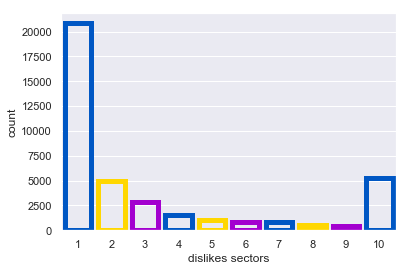

In [81]:
make_countplot('dislikes sectors')

ok looks better, now how looks like

In [82]:
data.head()

,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,...,word 11,word 12,word 13,channel Code,Publish Quarter,publish time code,tags code,views sector,likes sectors,dislikes sectors
0,26,7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,...,0,0,0,631,2,246,1795,8,2,10
1,24,1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,...,0,0,0,1137,2,275,1110,2,1,3
2,10,17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,...,0,0,1,375,3,260,423,10,10,10
3,17,27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,...,0,0,0,1126,1,284,1136,1,1,1
4,25,9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,...,0,0,0,277,1,283,1580,1,1,1


____

how about comment count

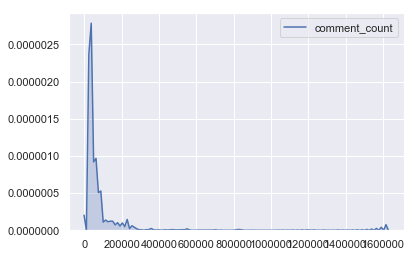

In [83]:
make_kdeplot('comment_count')

let's repeat it with 10 thousand

In [84]:
feature_sectors(data ,10000 , 'comment_count' , 'comment_count sectors')

how it looks

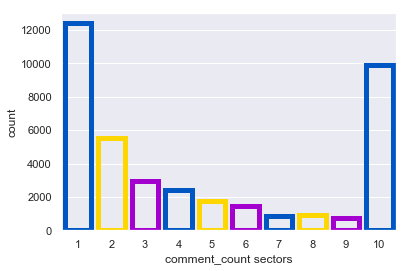

In [85]:
make_countplot('comment_count sectors')

____

ow the thubnail link will be useless for us

In [86]:
data.drop(['thumbnail_link'],axis=1, inplace=True)

also we have to convert comment_disabled , rating_disabled , video_error_or_removed , using label encoder to be either 1 or 0

In [87]:
make_label_encoder('comments_disabled','comments_disabled code')
make_label_encoder('ratings_disabled','ratings_disabled code')
make_label_encoder('video_error_or_removed','video_error_or_removed')

how data looks now

In [88]:
data.head()

,category_id,views,likes,dislikes,comment_count,description,video_id Code,Year,Month,Day,...,channel Code,Publish Quarter,publish time code,tags code,views sector,likes sectors,dislikes sectors,comment_count sectors,comments_disabled code,ratings_disabled code
0,26,7224515,55681,10247,9479,Click here to continue the story and make your...,1047,0,11,14,...,631,2,246,1795,8,2,10,10,0,0
1,24,1053632,25561,2294,2757,Musical guest Taylor Swift performs …Ready for...,227,0,11,14,...,1137,2,275,1110,2,1,3,3,0,0
2,10,17158579,787420,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,2628,0,11,14,...,375,3,260,423,10,10,10,10,0,0
3,17,27833,193,12,37,Salford drew 4-4 against the Class of 92 and F...,1344,0,11,14,...,1126,1,284,1136,1,1,1,1,0,0
4,25,9815,30,2,30,Dashcam captures truck's near miss with child ...,2854,0,11,14,...,277,1,283,1580,1,1,1,1,0,0


____

now the description , how many unique values here ? 


In [89]:
len(data['description'].unique())

3705

so we'll not be able to encode it , since it contains many unusual charracters , so we'll have to drop it

In [90]:
data.drop(['description'],axis=1, inplace=True)

now the last feature : category_id

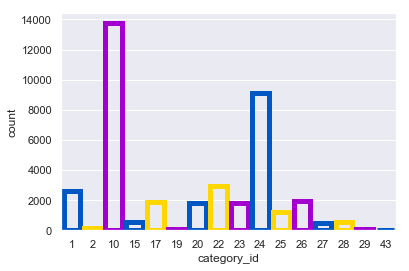

In [91]:
make_countplot('category_id')

ok looks fine , how many unique values are there ? 

In [92]:
len(data['category_id'].unique())

16

great , now we are ready , let's have a final look 

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 32 columns):
category_id               38916 non-null int64
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
video_id Code             38916 non-null int32
Year                      38916 non-null int64
Month                     38916 non-null object
Day                       38916 non-null object
word 1                    38916 non-null int64
word 2                    38916 non-null int64
word 3                    38916 non-null int64
word 4                    38916 non-null int64
word 5                    38916 non-null int64
word 6                    38916 non-null int64
word 7                    38916 non-null int64
word 8                    38916 non-null int64
word 9                    38916 non-null int64
word 10                   38916 non-null in

we are lucky , no nulls 

_____

# Data Splitting

first we'll need to define X & y


In [94]:
X = data.drop(['category_id'], axis=1, inplace=False)
y = data['category_id']

what are their shapes ? 

In [95]:
X.shape

(38916, 31)

In [96]:
y.shape

(38916,)

let's split it using sklearn

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (31132, 31)
X_test shape is  (7784, 31)
y_train shape is  (31132,)
y_test shape is  (7784,)


____

# Building the Model


how about using Gradient Boosting Classifier , with 100 estimators & 3 depth 

In [98]:
GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) 
GBCModel.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=33,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

great. we need to have a look for the test score

In [99]:
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Test Score is :  0.8250256937307296


ok , not a very great accuracy , how about Decision Tree Classifier , it might be helpful

In [100]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.9994539380701529
DecisionTreeClassifierModel Test Score is :  0.9630010277492291


great accuracy , let's use it in prediction 

In [101]:
#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(X_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(X_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:20])

Predicted Value for DecisionTreeClassifierModel is :  [24 24 24 24 24 20 24 22 17 15 24 23 10 22 10 24 26 10 26  1]
